In [1]:
import pandas as pd

data was uploaded from https://github.com/CSSEGISandData/COVID-19

In [2]:
url_case = r'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
# df = pd.read_csv('time_series_covid19_confirmed_global.csv', index_col=1)
df = pd.read_csv(url_case, index_col=1)

In [3]:
# df.head()

In [4]:
list_ = [i for i in range(0, 15)] # 0 cases list

df_1 = df.drop(['Lat', 'Long','Province/State'], axis=1)
df_1 = df_1.drop(df_1.columns[list_], axis='columns')
# df_1

In [5]:
df_1 = df_1[(df_1.index == 'US') \
            | (df_1.index == 'Russia') | (df_1.index == 'Italy')\
            | (df_1.index == 'Germany') | (df_1.index == 'Spain')\
            | (df_1.index == 'Switzerland') | (df_1.index == 'Sweden')\
            | (df_1.index == 'Norway') | (df_1.index == 'Poland')\
            | (df_1.index == 'Ukraine') | (df_1.index == 'Estonia')]


df_c_avg = df_1.copy()
df_1

,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,...,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Estonia,0,0,0,0,0,0,0,0,0,0,...,1635,1643,1647,1660,1666,1689,1694,1699,1700,1703
Germany,12,13,13,14,14,16,16,16,16,16,...,156513,157770,158758,159912,161539,163009,164077,164967,165664,166152
Italy,2,3,3,3,3,3,3,3,3,3,...,195351,197675,199414,201505,203591,205463,207428,209328,210717,211938
Norway,0,0,0,0,0,0,0,0,0,0,...,7499,7527,7599,7660,7710,7738,7783,7809,7847,7904
Poland,0,0,0,0,0,0,0,0,0,0,...,11273,11617,11902,12218,12640,12877,13105,13375,13693,14006
Russia,2,2,2,2,2,2,2,2,2,2,...,74588,80949,87147,93558,99399,106498,114431,124054,134687,145268
Spain,1,1,1,2,2,2,2,2,2,2,...,205905,207634,209465,210773,212917,213435,213435,216582,217466,218011
Sweden,1,1,1,1,1,1,1,1,1,1,...,18177,18640,18926,19621,20302,21092,21520,22082,22317,22721
Switzerland,0,0,0,0,0,0,0,0,0,0,...,28894,29061,29164,29264,29407,29586,29705,29817,29905,29981


In [6]:
df_2 = df_1.dropna().T
df_2['Russia'].plot(c='r', figsize=(15, 10), title='cases',legend="Russia",)
df_2['US'].plot(c='g', legend="US")
df_2['Spain'].plot(c='orange', legend='Spain')
df_2['Germany'].plot(c='k',legend="Germany")
df_2['Italy'].plot(c='b', legend="It", logy=True).grid()


In [7]:
df_pop = pd.read_csv('UID_ISO_FIPS_LookUp_Table.csv')
df_pop = df_pop.drop(['UID', 'iso2','iso3','code3','FIPS',\
                      'Admin2','Lat','Long_', 'Province_State','Combined_Key'], axis=1)


In [8]:
# df_pop.shape

In [9]:
# df_pop.head()

In [10]:
df_pop = df_pop.drop(df_pop.index[267:3574]) # reduce number of US's cells
df_pop = df_pop[(df_pop['Country_Region'] == 'US') | (df_pop['Country_Region'] == 'Russia') \
                | (df_pop['Country_Region'] == 'Italy') | (df_pop['Country_Region'] == 'Spain') \
                | (df_pop['Country_Region'] == 'Germany') | (df_pop['Country_Region'] == 'Switzerland')\
                | (df_pop['Country_Region'] == 'Sweden') | (df_pop['Country_Region'] == 'Norway')\
                | (df_pop['Country_Region'] == 'Poland') | (df_pop['Country_Region'] == 'Ukraine')\
                | (df_pop['Country_Region'] == 'Estonia')]
# df_pop


In [11]:
df_pop.rename(columns={'Country_Region' : 'Country/Region'}, inplace=True)
df_pop

,Country/Region,Population
53,Estonia,1326539.0
62,Germany,83783945.0
81,Italy,60461828.0
123,Norway,5421242.0
131,Poland,37846605.0
135,Russia,145934460.0
153,Spain,46754783.0
157,Sweden,10099270.0
158,Switzerland,8654618.0
169,Ukraine,43733759.0


In [12]:
df_pop.set_index('Country/Region', inplace=True)
# df_pop, df_pop.shape

In [13]:
df_per_capita = df_1.copy()
# df_per_capita

In [14]:
df_per_capita[0:1] = df_1[0:1].div(df_pop.iloc[0][0])
df_per_capita[1:2] = df_1[1:2].div(df_pop.iloc[1][0])
df_per_capita[2:3] = df_1[2:3].div(df_pop.iloc[2][0])
df_per_capita[3:4] = df_1[3:4].div(df_pop.iloc[3][0])
df_per_capita[4:5] = df_1[4:5].div(df_pop.iloc[4][0])

df_per_capita[5:6] = df_1[5:6].div(df_pop.iloc[5][0])
df_per_capita[6:7] = df_1[6:7].div(df_pop.iloc[6][0])
df_per_capita[7:8] = df_1[7:8].div(df_pop.iloc[7][0])
df_per_capita[8:9] = df_1[8:9].div(df_pop.iloc[8][0])
df_per_capita[9:10] = df_1[9:10].div(df_pop.iloc[9][0])
df_per_capita[10:11] = df_1[10:11].div(df_pop.iloc[10][0])

In [15]:
df_per_capita

,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,...,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Estonia,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.001233,0.001239,0.001242,0.001251,0.001256,0.001273,0.001277,0.001281,0.001282,0.001284
Germany,1.432255e-07,1.551610e-07,1.551610e-07,1.670965e-07,1.670965e-07,1.909674e-07,1.909674e-07,1.909674e-07,1.909674e-07,1.909674e-07,...,0.001868,0.001883,0.001895,0.001909,0.001928,0.001946,0.001958,0.001969,0.001977,0.001983
Italy,3.307872e-08,4.961808e-08,4.961808e-08,4.961808e-08,4.961808e-08,4.961808e-08,4.961808e-08,4.961808e-08,4.961808e-08,4.961808e-08,...,0.003231,0.003269,0.003298,0.003333,0.003367,0.003398,0.003431,0.003462,0.003485,0.003505
Norway,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.001383,0.001388,0.001402,0.001413,0.001422,0.001427,0.001436,0.001440,0.001447,0.001458
Poland,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000298,0.000307,0.000314,0.000323,0.000334,0.000340,0.000346,0.000353,0.000362,0.000370
Russia,1.370478e-08,1.370478e-08,1.370478e-08,1.370478e-08,1.370478e-08,1.370478e-08,1.370478e-08,1.370478e-08,1.370478e-08,1.370478e-08,...,0.000511,0.000555,0.000597,0.000641,0.000681,0.000730,0.000784,0.000850,0.000923,0.000995
Spain,2.138819e-08,2.138819e-08,2.138819e-08,4.277637e-08,4.277637e-08,4.277637e-08,4.277637e-08,4.277637e-08,4.277637e-08,4.277637e-08,...,0.004404,0.004441,0.004480,0.004508,0.004554,0.004565,0.004565,0.004632,0.004651,0.004663
Sweden,9.901706e-08,9.901706e-08,9.901706e-08,9.901706e-08,9.901706e-08,9.901706e-08,9.901706e-08,9.901706e-08,9.901706e-08,9.901706e-08,...,0.001800,0.001846,0.001874,0.001943,0.002010,0.002088,0.002131,0.002186,0.002210,0.002250
Switzerland,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.003339,0.003358,0.003370,0.003381,0.003398,0.003419,0.003432,0.003445,0.003455,0.003464


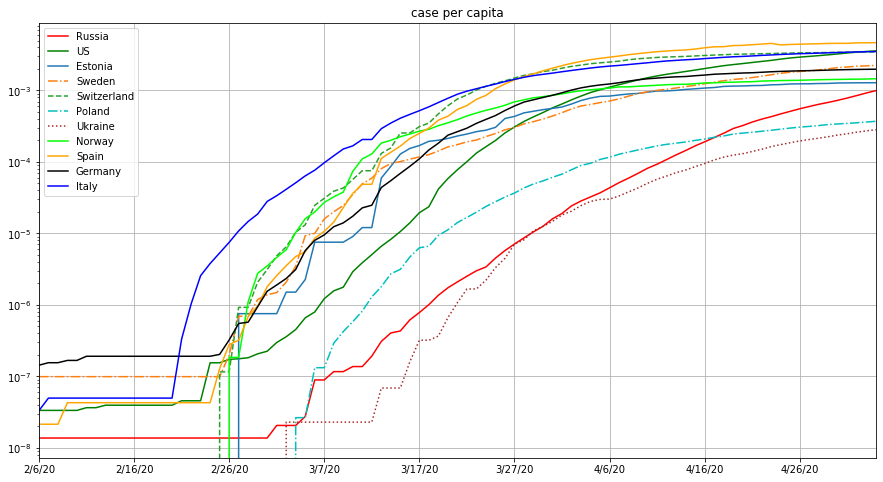

In [16]:
df_4_ = df_per_capita.T
df_4_['Russia'].plot(c='r', figsize=(15, 8), legend="RU", title='case per capita')
df_4_['US'].plot(c='g', legend="US", linestyle='solid')
df_4_['Estonia'].plot(legend="Est")
df_4_['Sweden'].plot(legend="Sw", linestyle='-.')
df_4_['Switzerland'].plot(legend="S", linestyle='--')
df_4_['Poland'].plot(c='c', legend="Pol", linestyle='dashdot')
df_4_['Ukraine'].plot(c='brown',legend="Ukr",linestyle=':')
df_4_['Norway'].plot(c='lime',legend="Nor")
df_4_['Spain'].plot(c='orange',legend="Spain", )
df_4_['Germany'].plot(c='k',legend="Germany", )
df_4_['Italy'].plot(c='b', legend="It", logy=True).grid()

In [17]:
url_death = r'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
# df_death = pd.read_csv('time_series_covid19_deaths_global.csv', index_col=1)
df_death = pd.read_csv(url_death, index_col=1)
df_death.head()

,Province/State,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,33.0000,65.0000,0,0,0,0,0,0,0,...,47,50,57,58,60,64,68,72,85,90
Albania,NaN,41.1533,20.1683,0,0,0,0,0,0,0,...,27,28,28,30,30,31,31,31,31,31
Algeria,NaN,28.0339,1.6596,0,0,0,0,0,0,0,...,419,425,432,437,444,450,453,459,463,465
Andorra,NaN,42.5063,1.5218,0,0,0,0,0,0,0,...,40,40,40,41,42,42,43,44,45,45
Angola,NaN,-11.2027,17.8739,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


In [18]:
df_death = df_death.drop(['Lat', 'Long','Province/State'], axis=1)

df_death = df_death.drop(df_death.columns[list_], axis='columns')
# df_death

In [19]:
df_death = df_death[(df_death.index == 'US') \
                    | (df_death.index == 'Russia') | (df_death.index == 'Italy')\
                    | (df_death.index == 'Spain') | (df_death.index == 'Germany')
                    | (df_death.index == 'Sweden') | (df_death.index == 'Poland')\
                    | (df_death.index == 'Estonia') | (df_death.index == 'Norway')
                    | (df_death.index == 'Ukraine') | (df_death.index == 'Switzerland')]

df_death

,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,...,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Estonia,0,0,0,0,0,0,0,0,0,0,...,46,49,50,50,50,52,52,53,55,55
Germany,0,0,0,0,0,0,0,0,0,0,...,5877,5976,6126,6314,6467,6623,6736,6812,6866,6993
Italy,0,0,0,0,0,0,0,0,0,0,...,26384,26644,26977,27359,27682,27967,28236,28710,28884,29079
Norway,0,0,0,0,0,0,0,0,0,0,...,201,201,205,206,207,210,210,211,211,214
Poland,0,0,0,0,0,0,0,0,0,0,...,524,535,562,596,624,644,651,664,678,698
Russia,0,0,0,0,0,0,0,0,0,0,...,681,747,794,867,972,1073,1169,1222,1280,1356
Spain,0,0,0,0,0,0,0,0,0,0,...,22902,23190,23521,23822,24275,24543,24543,25100,25264,25428
Sweden,0,0,0,0,0,0,0,0,0,0,...,2192,2194,2274,2355,2462,2586,2653,2669,2679,2769
Switzerland,0,0,0,0,0,0,0,0,0,0,...,1599,1610,1665,1699,1716,1737,1754,1762,1762,1784


In [20]:
df_death_to_case = df_death / df_1
df_death_to_case = df_death_to_case.fillna(0)

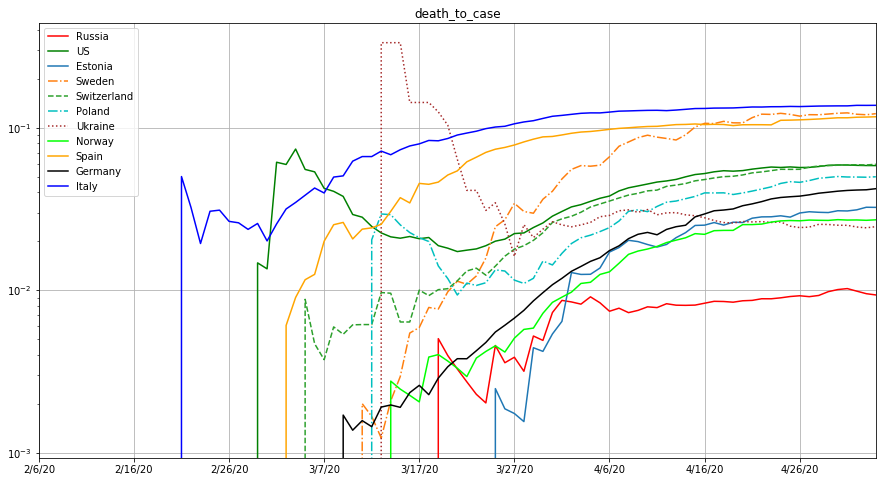

In [21]:
df_5 = df_death_to_case.T
df_5['Russia'].plot(c='r', figsize=(15, 8), legend="RU", title='death_to_case',)
df_5['US'].plot(c='g',legend="US",)
df_5['Estonia'].plot(legend="Est")
df_5['Sweden'].plot(legend="Sw", linestyle='-.')
df_5['Switzerland'].plot(legend="S", linestyle='--')
df_5['Poland'].plot(c='c', legend="Pol", linestyle='dashdot')
df_5['Ukraine'].plot(c='brown',legend="Ukr",linestyle=':')
df_5['Norway'].plot(c='lime',legend="Nor")
df_5['Spain'].plot(c='orange',legend="Spain", )
df_5['Germany'].plot(c='k',legend="Germany", )
df_5['Italy'].plot(c='b', legend="It", logy=True).grid()


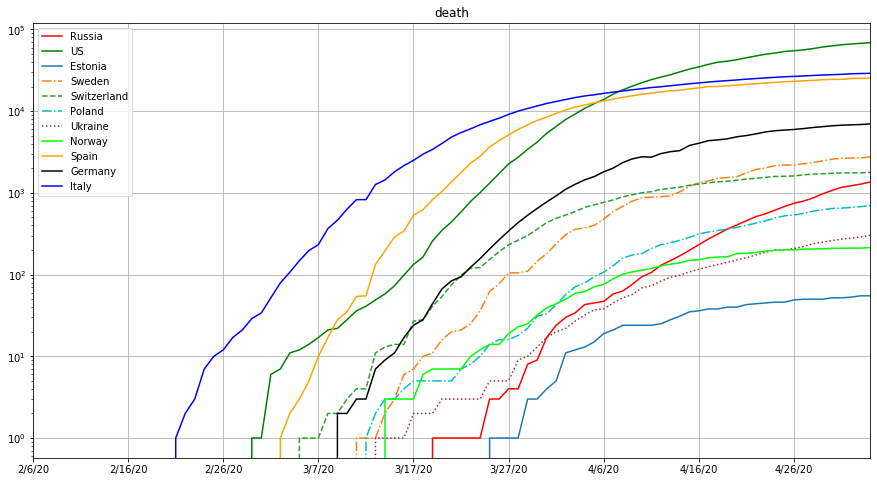

In [22]:
df_6 = df_death.T
df_6['Russia'].plot(c='r', figsize=(15, 8), legend="RU", title='death', logy=True)
df_6['US'].plot(c='g', legend="US", )
df_6['Estonia'].plot(legend="Est")
df_6['Sweden'].plot(legend="Sw",linestyle='-.' )
df_6['Switzerland'].plot(legend="S", linestyle='--')
df_6['Poland'].plot(c='c', legend="Pol", linestyle='dashdot')
df_6['Ukraine'].plot(c='brown',legend="Ukr",linestyle=':')
df_6['Norway'].plot(c='lime',legend="Nor")
df_6['Spain'].plot(c='orange',legend="Spain")
df_6['Germany'].plot(c='k',legend="Germany")
df_6['Italy'].plot(c='b', legend="It").grid()

In [23]:
# df['gdp'] = df['gdp'].shift(-1)
# df_per_capita
# df_death_to_case
# df_death

df_death_to_case = df_death_to_case.drop(df_death_to_case.columns[[i for i in range(0, 14)]], axis='columns')
# df_death_to_case

In [24]:
df_death_to_case.iloc[0] = df_death_to_case.iloc[0].shift(-33)
df_death_to_case.iloc[1] = df_death_to_case.iloc[1].shift(-17)
df_death_to_case.iloc[3] = df_death_to_case.iloc[3].shift(-22)
df_death_to_case.iloc[4] = df_death_to_case.iloc[4].shift(-20)
df_death_to_case.iloc[5] = df_death_to_case.iloc[5].shift(-27)
df_death_to_case.iloc[6] = df_death_to_case.iloc[6].shift(-11)
df_death_to_case.iloc[7] = df_death_to_case.iloc[7].shift(-19)
df_death_to_case.iloc[8] = df_death_to_case.iloc[8].shift(-13)
df_death_to_case.iloc[9] = df_death_to_case.iloc[9].shift(-21)
df_death_to_case.iloc[-1] = df_death_to_case.iloc[-1].shift(-8)

avg = df_death_to_case.T.mean(numeric_only=True, axis=1)


df_death_to_case_T = df_death_to_case.T
df_death_to_case_T['Avg'] = avg
df_death_to_case = df_death_to_case_T.T

# df_death_to_case
avg_d_t_c = avg.copy()


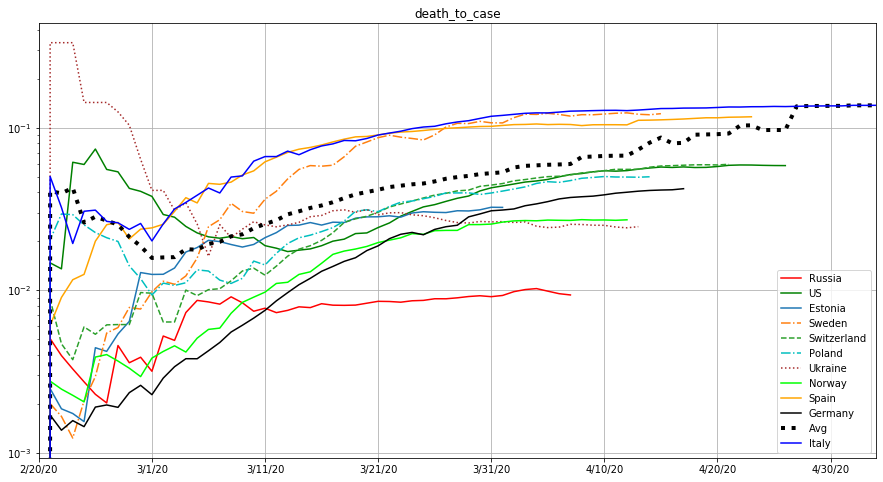

In [25]:
df_5 = df_death_to_case.T
df_5['Russia'].plot(c='r', figsize=(15, 8), legend="RU", title='death_to_case',)
df_5['US'].plot(c='g',legend="US",)
df_5['Estonia'].plot(legend="Est")
df_5['Sweden'].plot(legend="Sw", linestyle='-.')
df_5['Switzerland'].plot(legend="S", linestyle='--')
df_5['Poland'].plot(c='c', legend="Pol", linestyle='dashdot')
df_5['Ukraine'].plot(c='brown',legend="Ukr",linestyle=':')
df_5['Norway'].plot(c='lime',legend="Nor")
df_5['Spain'].plot(c='orange',legend="Spain", )
df_5['Germany'].plot(c='k',legend="Germany", )
df_5['Avg'].plot(c='k',legend="Avg",lw=4, linestyle=':' )
df_5['Italy'].plot(c='b', legend="It", logy=True).grid()

In [26]:
# df_per_capita.T

In [27]:
# per capita average

df_per_capita.iloc[0] = df_per_capita.iloc[0].shift(-13)
df_per_capita.iloc[1] = df_per_capita.iloc[1].shift(-11)
df_per_capita.iloc[2] = df_per_capita.iloc[2].shift(-6)
df_per_capita.iloc[3] = df_per_capita.iloc[3].shift(-12)
df_per_capita.iloc[4] = df_per_capita.iloc[4].shift(-21)
df_per_capita.iloc[5] = df_per_capita.iloc[5].shift(-21)
df_per_capita.iloc[6] = df_per_capita.iloc[6].shift(-11)
df_per_capita.iloc[7] = df_per_capita.iloc[7].shift(-11)
df_per_capita.iloc[8] = df_per_capita.iloc[8].shift(-11)
df_per_capita.iloc[9] = df_per_capita.iloc[9].shift(-30)
df_per_capita.iloc[-1] = df_per_capita.iloc[-1].shift(-10)

avg_case = df_per_capita.T.mean(numeric_only=True, axis=1)
avg_case, type(avg_case)

df_per_capita_T = df_per_capita.T
df_per_capita_T['Average'] = avg_case
df_per_capita = df_per_capita_T.T

# df_per_capita, avg_case

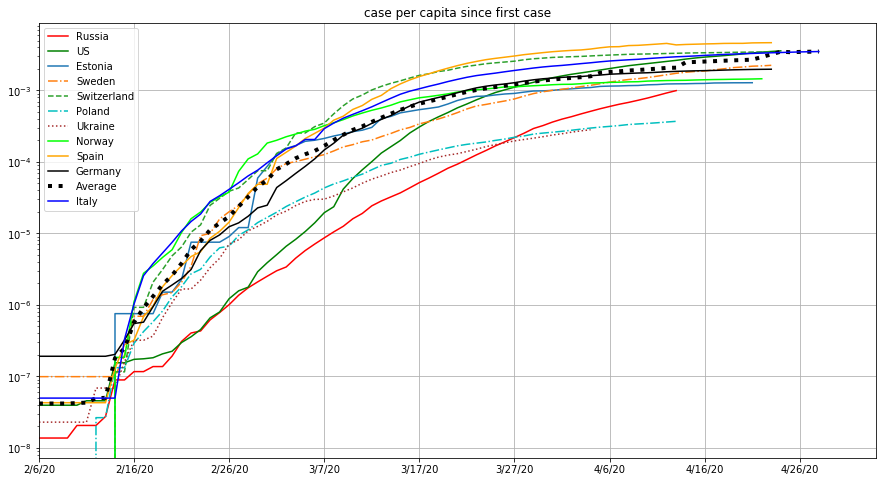

In [28]:
df_4 = df_per_capita_T
df_4['Russia'].plot(c='r', figsize=(15, 8), legend="RU", title='case per capita since first case')
df_4['US'].plot(c='g', legend="US", linestyle='solid')
df_4['Estonia'].plot(legend="Est")
df_4['Sweden'].plot(legend="Sw", linestyle='-.')
df_4['Switzerland'].plot(legend="S", linestyle='--')
df_4['Poland'].plot(c='c', legend="Pol", linestyle='dashdot')
df_4['Ukraine'].plot(c='brown',legend="Ukr",linestyle=':')
df_4['Norway'].plot(c='lime',legend="Nor")
df_4['Spain'].plot(c='orange',legend="Spain", )
df_4['Germany'].plot(c='k',legend="Germany", )
df_4['Average'].plot(c='k',legend="Avg",lw=4, linestyle=':' )
df_4['Italy'].plot(c='b', legend="It", logy=True).grid()

In [29]:
df_d = df_death.copy()
df_d.iloc[0] = df_d.iloc[0].shift(-43)
df_d.iloc[1] = df_d.iloc[1].shift(-24)
df_d.iloc[2] = df_d.iloc[2].shift(-7)
df_d.iloc[3] = df_d.iloc[3].shift(-29)
df_d.iloc[4] = df_d.iloc[4].shift(-27)
df_d.iloc[5] = df_d.iloc[5].shift(-39)
df_d.iloc[6] = df_d.iloc[6].shift(-18)
df_d.iloc[7] = df_d.iloc[7].shift(-28)
df_d.iloc[8] = df_d.iloc[8].shift(-22)
df_d.iloc[9] = df_d.iloc[9].shift(-31)
df_d.iloc[10] = df_d.iloc[10].shift(-16)

avg_death = df_d.T.mean(numeric_only=True, axis=1)
# avg_death, type(avg_death)

df_death_T = df_d.T
df_death_T['average'] = avg_death
df_death = df_death_T.T

# df_death

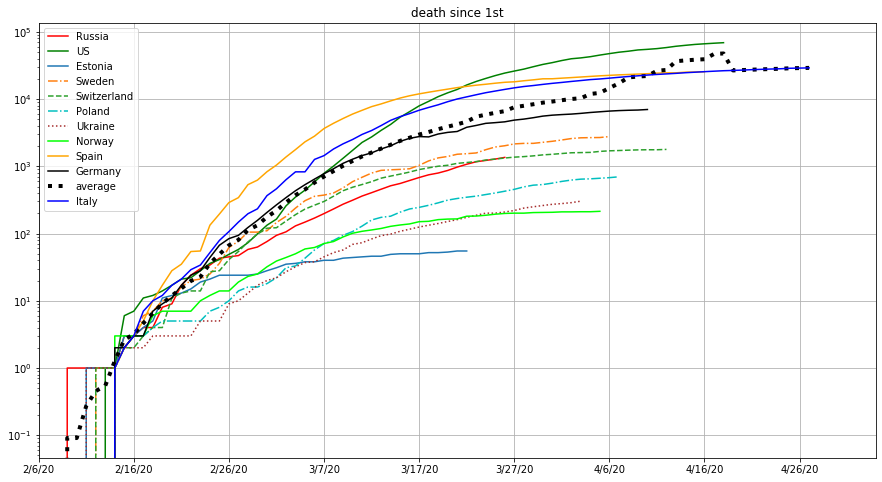

In [30]:
df_6 = df_death.T
df_6['Russia'].plot(c='r', figsize=(15, 8), legend="RU", title='death since 1st', logy=True)
df_6['US'].plot(c='g', legend="US", )
df_6['Estonia'].plot(legend="Est")
df_6['Sweden'].plot(legend="Sw",linestyle='-.' )
df_6['Switzerland'].plot(legend="S", linestyle='--')
df_6['Poland'].plot(c='c', legend="Pol", linestyle='dashdot')
df_6['Ukraine'].plot(c='brown',legend="Ukr",linestyle=':')
df_6['Norway'].plot(c='lime',legend="Nor")
df_6['Spain'].plot(c='orange',legend="Spain")
df_6['Germany'].plot(c='k',legend="Germany")
df_6['average'].plot(c='k',legend="Avg",lw=4, linestyle=':' )
df_6['Italy'].plot(c='b', legend="It").grid()

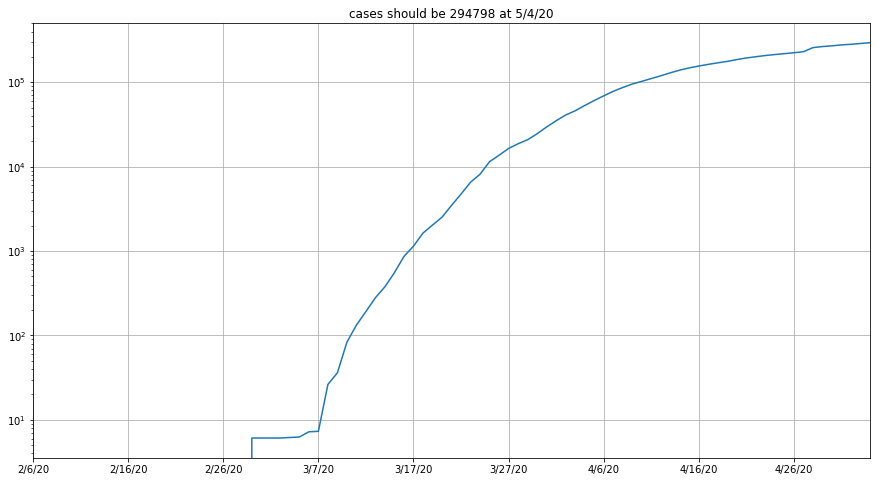

In [77]:
import numpy as np

for d in range(17, 31):
    avg_case[f'4/{d}/20']=np.nan
    avg_d_t_c[f'4/{d}/20']=np.nan
    
pred_case_rus = (avg_case.shift(23) * df_pop.iloc[5][0]).fillna(0)
# (df_4_['Russia']).shift(21).plot(c='r', figsize=(15, 8), legend="RU", title='case per capita',)
pred_case_rus.plot(logy=True, figsize=(15, 8), 
                   title=f'cases should be {int(pred_case_rus[-1])} at {pred_case_rus.index[-1]}').grid()
# int(pred_case_rus[-1])
# pred_case_rus.index[-1]

In [32]:
# df_death_T = df_d.T
# df_death_T['average'] = avg_death
# df_death = df_death_T.T

df_c_avg_T = df_c_avg.T
df_c_avg_T['Rus_pred'] = pred_case_rus.round().fillna(0)
df_c_avg = df_c_avg_T.T.fillna(0)
df_c_avg.tail(7)



,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,...,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Russia,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,74588.0,80949.0,87147.0,93558.0,99399.0,106498.0,114431.0,124054.0,134687.0,145268.0
Spain,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,205905.0,207634.0,209465.0,210773.0,212917.0,213435.0,213435.0,216582.0,217466.0,218011.0
Sweden,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,18177.0,18640.0,18926.0,19621.0,20302.0,21092.0,21520.0,22082.0,22317.0,22721.0
Switzerland,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,28894.0,29061.0,29164.0,29264.0,29407.0,29586.0,29705.0,29817.0,29905.0,29981.0
Ukraine,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8125.0,8617.0,9009.0,9410.0,9866.0,10406.0,10861.0,11411.0,11913.0,12331.0
US,11.0,11.0,11.0,11.0,11.0,12.0,12.0,13.0,13.0,13.0,...,938154.0,965785.0,988197.0,1012582.0,1039909.0,1069424.0,1103461.0,1132539.0,1158040.0,1180375.0
Rus_pred,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,218637.0,223952.0,230574.0,257729.0,265316.0,270493.0,277663.0,282176.0,288300.0,294798.0


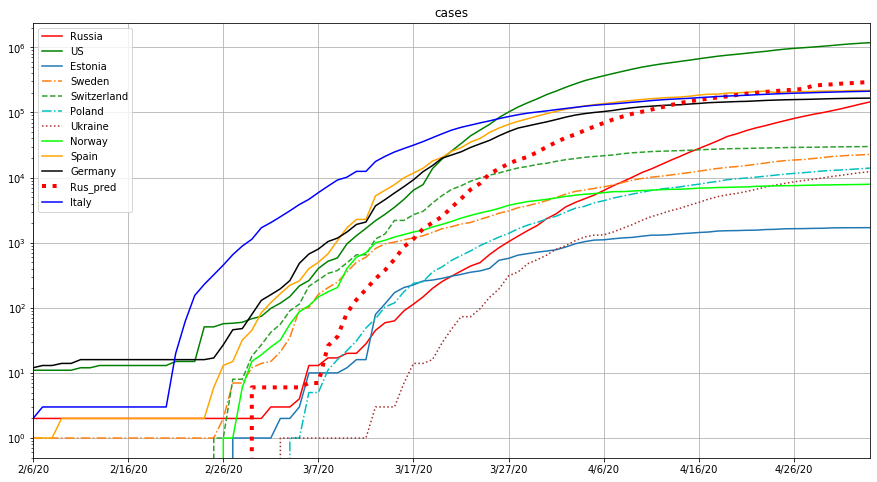

In [46]:
_df_4_ = df_c_avg.T
_df_4_['Russia'].plot(c='r', figsize=(15, 8), legend="RU", title='cases')
_df_4_['US'].plot(c='g', legend="US", linestyle='solid')
_df_4_['Estonia'].plot(legend="Est")
_df_4_['Sweden'].plot(legend="Sw", linestyle='-.')
_df_4_['Switzerland'].plot(legend="S", linestyle='--')
_df_4_['Poland'].plot(c='c', legend="Pol", linestyle='dashdot')
_df_4_['Ukraine'].plot(c='brown',legend="Ukr",linestyle=':')
_df_4_['Norway'].plot(c='lime',legend="Nor")
_df_4_['Spain'].plot(c='orange',legend="Spain", )
_df_4_['Germany'].plot(c='k',legend="Germany", )
_df_4_['Rus_pred'].plot(c='r',legend="Avg",lw=4, linestyle=':', )
_df_4_['Italy'].plot(c='b', legend="It", logy=True).grid()

In [34]:
avg_d_t_c 
pred_d_to_c_rus = avg_d_t_c .shift(8).fillna(0)


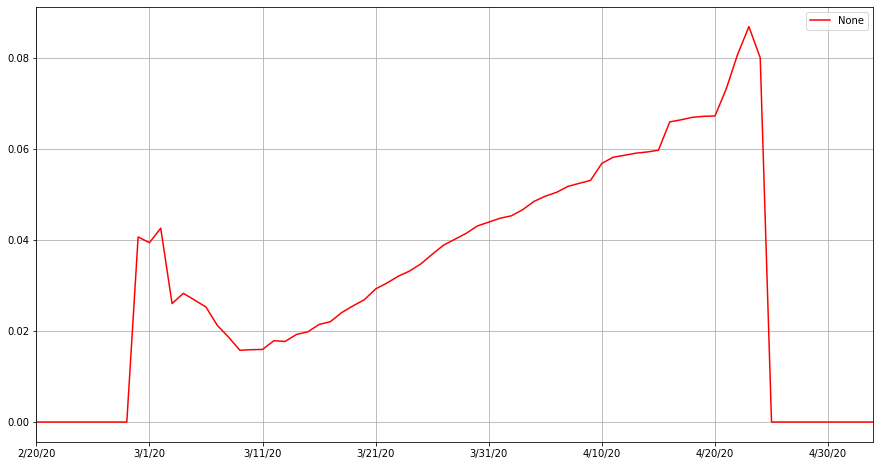

In [79]:
pred_d_to_c_rus.plot(logy=False, legend="pred", figsize=(15, 8), c='r').grid()


In [36]:
for k in range(7, 21):
    pred_case_rus=pred_case_rus.drop(index=f'2/{k}/20')

In [37]:
pred_death_rus = [0]
for m in range(len(pred_d_to_c_rus)):
    pred_death_rus.append(pred_d_to_c_rus[m] * pred_case_rus[m])
    
pred_death_rus = pd.Series(pred_death_rus)
# pred_death_rus

In [38]:
# labels = ['2/20/20', '3/1/20', '3/11/20', '3/21/20', '3/31/20', '4/10/20', '4/20/20', '4/30/20']
# loc = [0,10,20,30,40,50,60,70]
# xticks = {loc: labels}
# pred_death_rus.plot(logy=False, c='r', legend="pred",title='60 -> 20/4/2020').grid()

In [39]:
date_= pd.Series(df_1.iloc[0].index)    
# date_

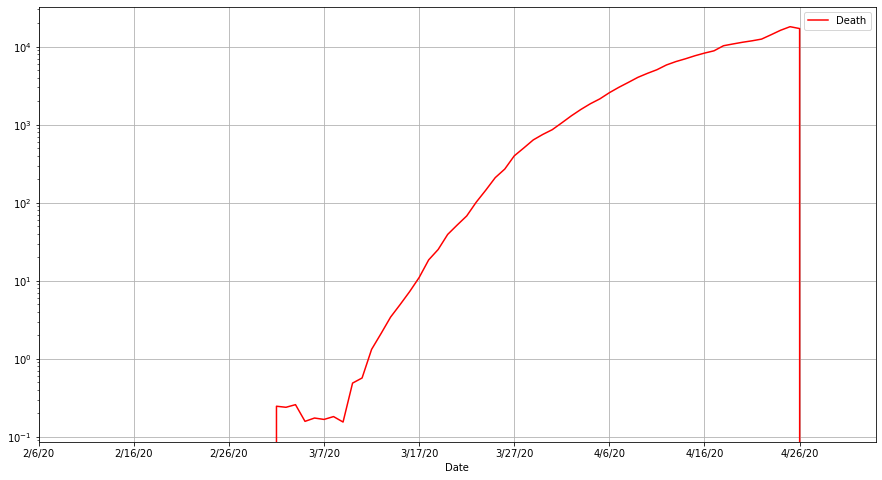

In [47]:
d = pd.DataFrame({'Date' : date_, 'Death': pred_death_rus}, )
d['Death'] = d['Death'].shift(15)
d.set_index('Date', inplace=True)
d.plot(c='r',figsize=(15, 8), logy=True).grid()